In [13]:
import pandas as pd
df_model = pd.read_csv('../data/data_to_cluster.csv')

In [14]:
df_model.head()

,'u,abl,access,acent,action,actualizacion,adttnf,advantag,age,ago,...,you'll,yrqv,yypohh,yzvmgmjbk,z,zae,zl,zr,zwfzskn,zxmgysbojb
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.241345,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.257764,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.390923,0.000000,0.0,0.0,0.0,0.0,0.0


[0.02990154 0.02818735 0.02547846]
[0.02990154 0.05808889 0.08356735]


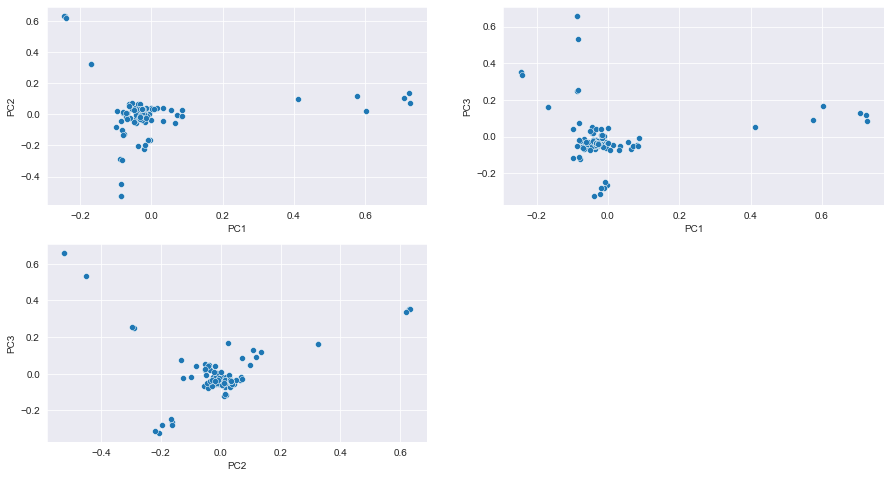

In [15]:
#PCA

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df_model)
df_pca = pd.DataFrame(data=pca_fit, columns=['PC1','PC2','PC3'])
df_pca.head()
fig, ax = plt.subplots(2, 2, figsize=(15,8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2',ax=ax[0][0])
sns.scatterplot(data=df_pca, x='PC1', y='PC3',ax=ax[0][1])
sns.scatterplot(data=df_pca, x='PC2', y='PC3',ax=ax[1][0])
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
fig.delaxes(ax[1][1])

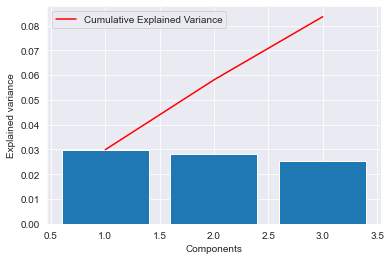

In [16]:
# Cumulative explained variance

import numpy as np

plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

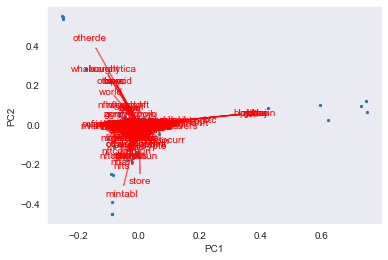

In [17]:
# Biplot

def my_plot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'red', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'r', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

my_plot(pca_fit[:, 0:2], np.transpose(pca.components_[0:2, :]), list(df_model.columns))
plt.show()

In [18]:
# Loadings matrix

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_model.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3
variable,,,
'u,-0.002379,0.001762,-0.003611
abl,0.023425,0.007931,-0.002064
access,-0.005139,-0.001784,-0.007579
acent,0.003626,0.004475,-0.006781
action,-0.002379,0.001762,-0.003611
...,...,...,...
zae,-0.003279,0.003232,-0.004542
zl,-0.017889,0.003626,-0.018510
zr,-0.006228,-0.010767,0.006511


In [19]:
# Varimax rotation
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=3, method='principal', rotation="varimax")
fa_fit = fa.fit_transform(df_model)
loadings = fa.loadings_
fa.get_factor_variance()[2]

/usr/local/lib/python3.9/site-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:776: UserWarning: Unable to calculate the factor score weights; factor loadings used instead: Singular matrix
  warnings.warn('Unable to calculate the factor score weights; '


array([0.02693125, 0.0531177 , 0.07921261])

In [20]:
# Varimax loadings matrix
pd.DataFrame.from_records(loadings)

,0,1,2
0,-0.199071,-0.701390,0.665493
1,-0.009222,-0.025661,-0.021952
2,-0.004106,-0.002853,-0.019866
3,-0.001275,0.000308,-0.017697
4,-0.199071,-0.701390,0.665493
...,...,...,...
966,-0.004328,-0.025481,-0.006142
967,0.001719,-0.003605,-0.018564
968,0.008166,-0.004922,-0.012599
969,0.008107,-0.001614,-0.009369


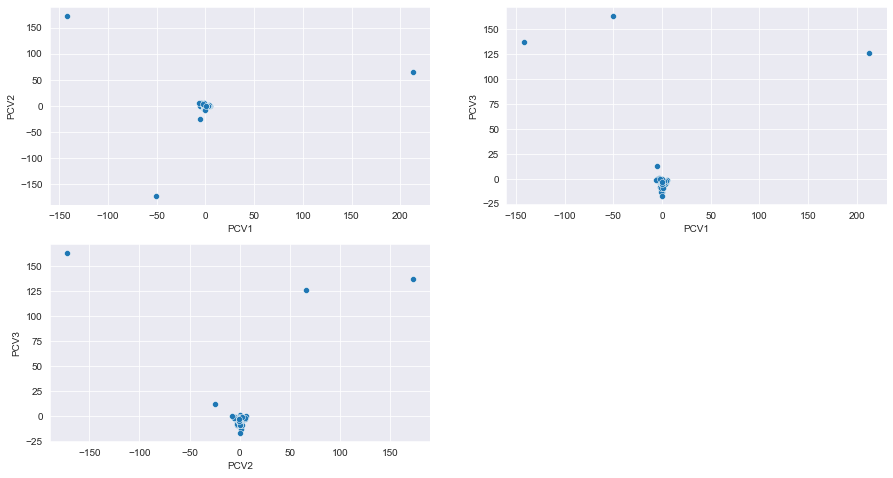

In [21]:
# New Principal Components after varimax 
df_fa = pd.DataFrame(data=fa_fit, columns=['PCV1', 'PCV2','PCV3'])
df_fa.head()
fig, ax = plt.subplots(2, 2, figsize=(15,8))
sns.scatterplot(data=df_fa, x='PCV1', y='PCV2',ax=ax[0][0])
sns.scatterplot(data=df_fa, x='PCV1', y='PCV3',ax=ax[0][1])
sns.scatterplot(data=df_fa, x='PCV2', y='PCV3',ax=ax[1][0])
fig.delaxes(ax[1][1])

In [25]:
# Hopkins Statistic
from pyclustertend import hopkins

1-hopkins(df_model, df_model.shape[0])

ImportError: Numba needs NumPy 1.20 or less